In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import seaborn as sns
import pickle
from statsmodels.tsa.stattools import adfuller

In [2]:
df_test = pd.read_pickle("Data_Wrangling_test.pkl")

In [3]:
df = pd.read_pickle("Data_Wrangling.pkl")

In [4]:
df_test.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,browser,deviceCategory,OS,subContinent,...,timeonsite,Revenue_Original,source,transactionRevenueLog,Revenue_label,month_year,hourofday,timeofday,timeofweek,day
0,Organic Search,2018-05-11,7460955084541987166,1526099341,2,2018-05-12 04:29:01,Chrome,mobile,Android,Southern Asia,...,973,0,google,0.0,0,2018-05,4,Morn,Saturday,12
1,Direct,2018-05-11,460252456180441002,1526064483,166,2018-05-11 18:48:03,Chrome,desktop,Macintosh,Northern America,...,49,0,(direct),0.0,0,2018-05,18,Even,Friday,11
2,Organic Search,2018-05-11,3461808543879602873,1526067157,2,2018-05-11 19:32:37,Chrome,desktop,Chrome OS,Northern America,...,24,0,google,0.0,0,2018-05,19,Even,Friday,11
3,Direct,2018-05-11,975129477712150630,1526107551,4,2018-05-12 06:45:51,Chrome,mobile,iOS,Northern America,...,25,0,(direct),0.0,0,2018-05,6,Morn,Saturday,12
4,Organic Search,2018-05-11,8381672768065729990,1526060254,1,2018-05-11 17:37:34,Internet Explorer,tablet,Windows,Northern America,...,49,0,google,0.0,0,2018-05,17,Even,Friday,11


In [5]:
df.shape

(1708337, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708337 entries, 0 to 1701301
Data columns (total 23 columns):
channelGrouping          object
date                     object
fullVisitorId            object
visitId                  int64
visitNumber              int64
visitStartTime           datetime64[ns]
browser                  object
deviceCategory           object
OS                       object
subContinent             object
hits                     int64
pageviews                float64
sessionQualityDim        float64
timeonsite               float64
Revenue_Original         int64
source                   object
transactionRevenueLog    float64
Revenue_label            int64
month_year               object
hourofday                int64
timeofday                object
timeofweek               object
day                      int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(11)
memory usage: 312.8+ MB


Main Question: What does our data look like?
 - 1. How are the data distributed among each catergory?
 - 2. How many visitors per day?

# Data Distribution

## Catergory

In [95]:
def plot_compare_users(df,DataR,DataNonR,col,value = None,sharex=True,sharey=True):
    if value == None:
        order = df[col].value_counts().index
    else:
        order = df[col].value_counts().iloc[:value].index
    fig, ax = plt.subplots(1,3, figsize = (12, 6))
    
    sns.countplot(col, data=df, ax = ax[0], order=order)
    ax[0].set_title('All users count')
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
    
    sns.countplot(col, data=DataNonR, ax = ax[1],  order=order)
    ax[1].set_title('Non Paying users count')
    ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
    
    sns.countplot(col, data=DataR, ax = ax[2],  order=order)
    ax[2].set_title('Paying users count')
    ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation=90)
    
    plt.tight_layout()
    plt.show()

### Channel Grouping

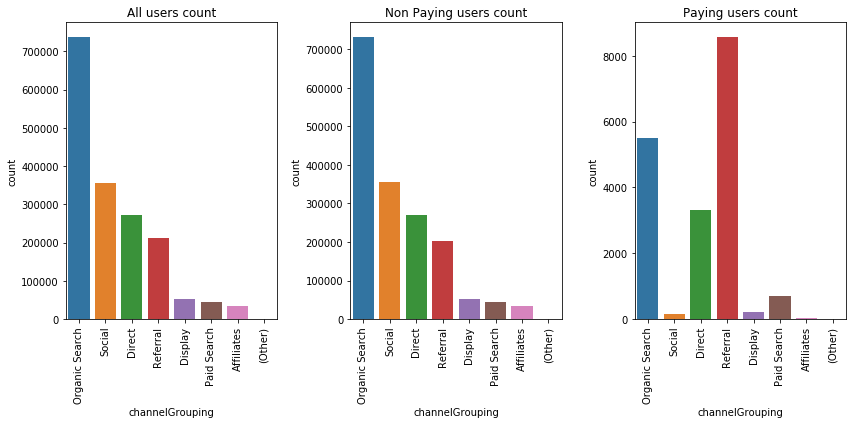

In [96]:
plot_compare_users(df,DataR,DataNonR,'channelGrouping')2

### Device

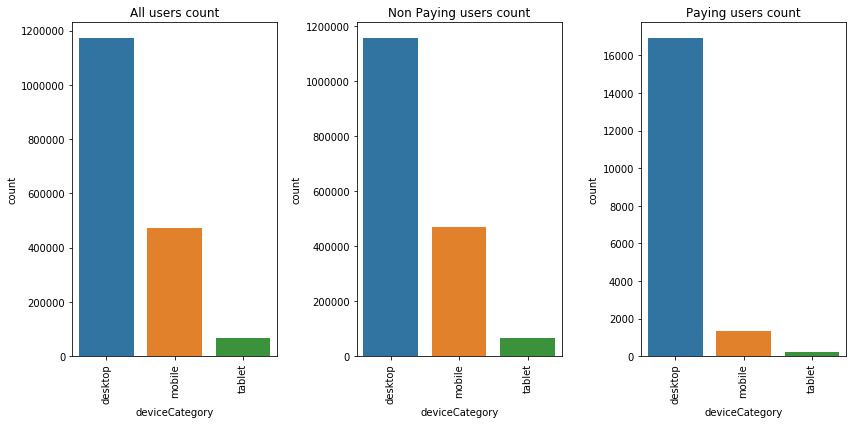

In [97]:
plot_compare_users(df,DataR,DataNonR,'deviceCategory')

### Sub-continent

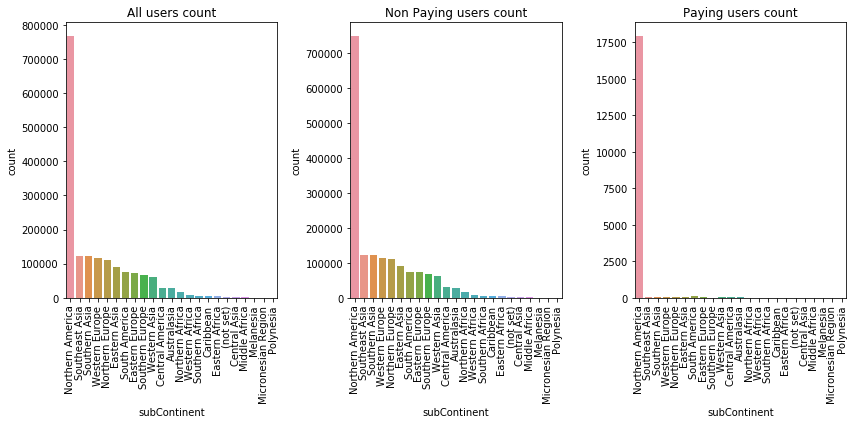

In [98]:
plot_compare_users(df,DataR,DataNonR,'subContinent')

### OS

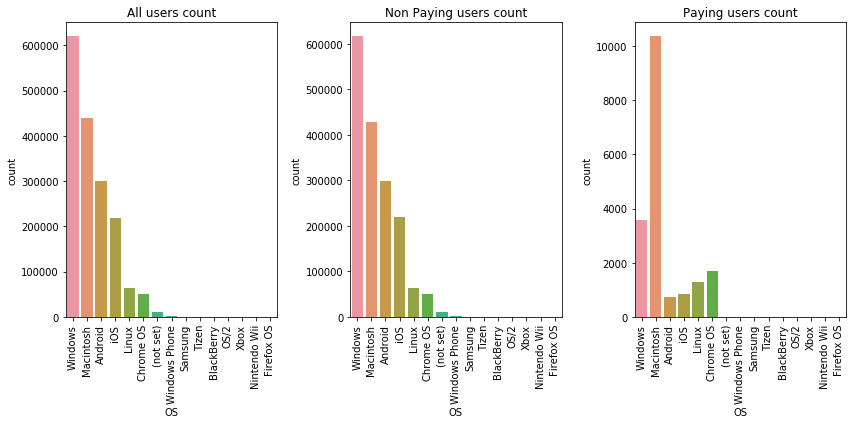

In [99]:
plot_compare_users(df,DataR,DataNonR,'OS',15)

### Sources

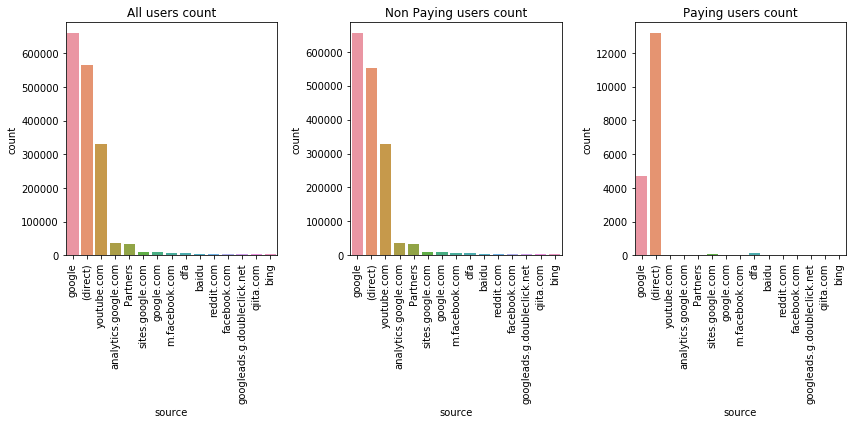

In [100]:
plot_compare_users(df,DataR,DataNonR,'source',15)

### Browser

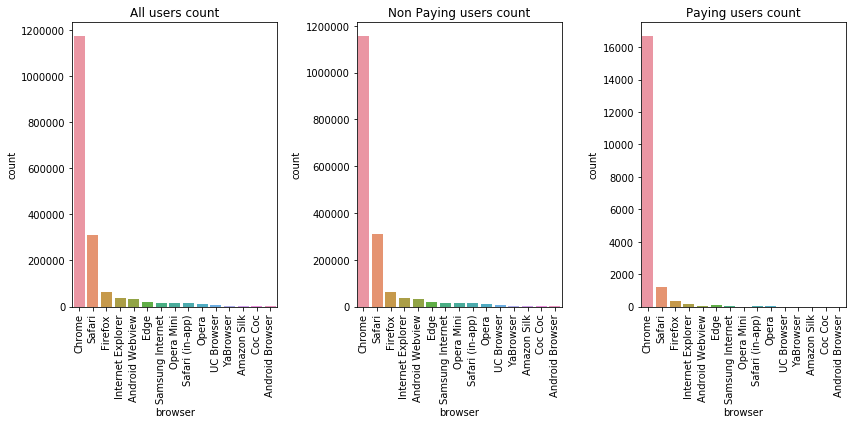

In [101]:
plot_compare_users(df,DataR,DataNonR,'browser',15)

Overall Question: How are Data with Revenue different from Data with Non Revenue?
 1. Pagviews
 2. Visit Numbers

In [16]:
DataR = df[df['Revenue_label'] == 1]
DataNonR = df[df['Revenue_label'] != 1]

(array([8.76567e+05, 3.92690e+05, 1.99099e+05, 1.40642e+05, 6.55930e+04,
        2.62150e+04, 6.50700e+03, 8.94000e+02, 1.03000e+02, 2.70000e+01]),
 array([0.        , 0.62146081, 1.24292162, 1.86438243, 2.48584324,
        3.10730405, 3.72876486, 4.35022567, 4.97168648, 5.59314729,
        6.2146081 ]),
 <a list of 10 Patch objects>)

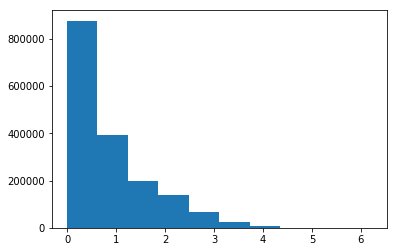

In [286]:
plt.hist(np.log(df['pageviews']))

### Pageviews

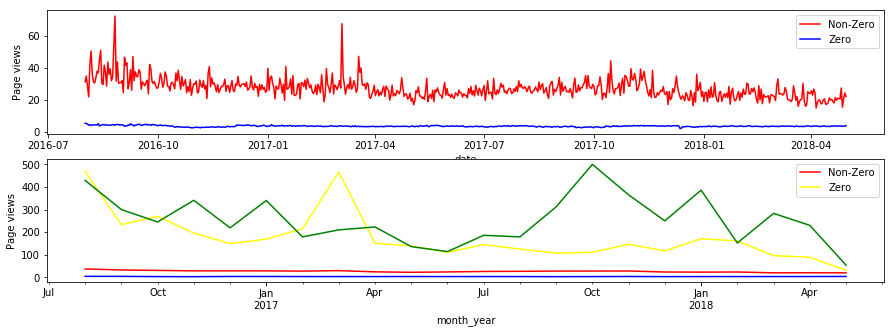

In [291]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15, 5))
DataR.groupby(['date'])['pageviews'].mean().plot(ax = ax[0],color="red")
DataNonR.groupby(['date'])['pageviews'].mean().plot(ax = ax[0],color="blue")
ax[0].legend(['Non-Zero','Zero'])
ax[0].set_ylabel('Page views')
DataR.groupby(['month_year'])['pageviews'].mean().plot(ax = ax[1],color="red")
DataR.groupby(['month_year'])['pageviews'].max().plot(ax = ax[1],color="yellow")
DataNonR.groupby(['month_year'])['pageviews'].mean().plot(ax = ax[1],color="blue")
DataNonR.groupby(['month_year'])['pageviews'].max().plot(ax = ax[1],color="green")
ax[1].legend(['Non-Zero','Zero'])

ax[1].set_ylabel('Page views')
plt.show()

### Visit Numbers

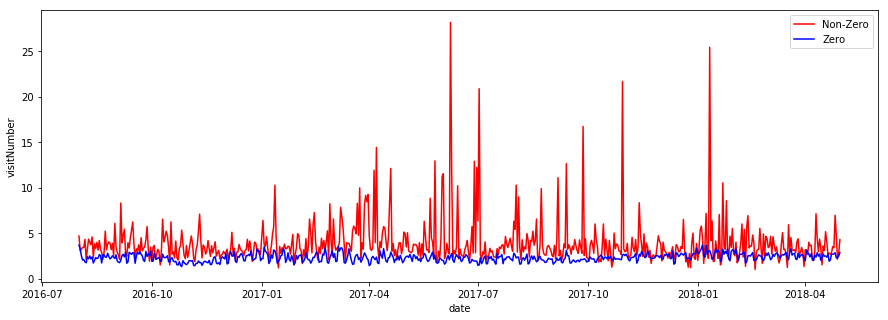

In [288]:
fig, ax = plt.subplots(figsize=(15, 5))
DataR.groupby(['date'])['visitNumber'].mean().plot(ax = ax,color="red")
DataNonR.groupby(['date'])['visitNumber'].mean().plot(ax = ax,color="blue")
ax.legend(['Non-Zero','Zero'])
plt.ylabel('visitNumber')
plt.show()

### sessionQualityDim

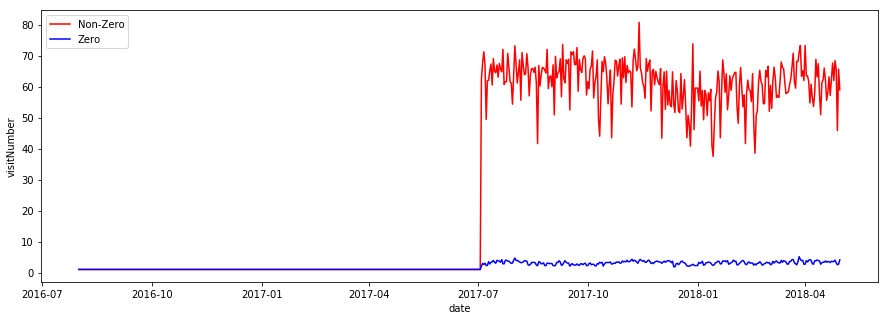

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
DataR.groupby(['date'])['sessionQualityDim'].mean().plot(ax = ax,color="red")
DataNonR.groupby(['date'])['sessionQualityDim'].mean().plot(ax = ax,color="blue")
ax.legend(['Non-Zero','Zero'])
plt.ylabel('sessionQualityDim')
plt.show()

we noticed that begining of 2017-07. Data with Revenue has a higher average of session Quality Dim. We Would need to fill Data with Revenue prior to 2018-07 with median value from the data with later dates

### Time on Site

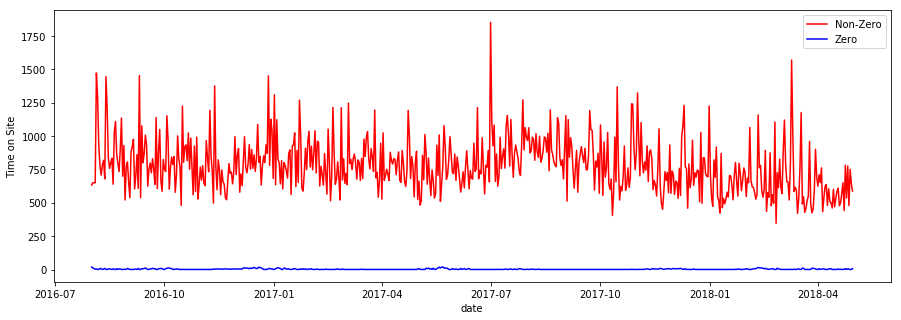

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
DataR.groupby(['date'])['timeonsite'].median().plot(ax = ax,color="red")
DataNonR.groupby(['date'])['timeonsite'].median().plot(ax = ax,color="blue")
ax.legend(['Non-Zero','Zero'])
plt.ylabel('Time on Site')
plt.show()

## Spotting Outliers

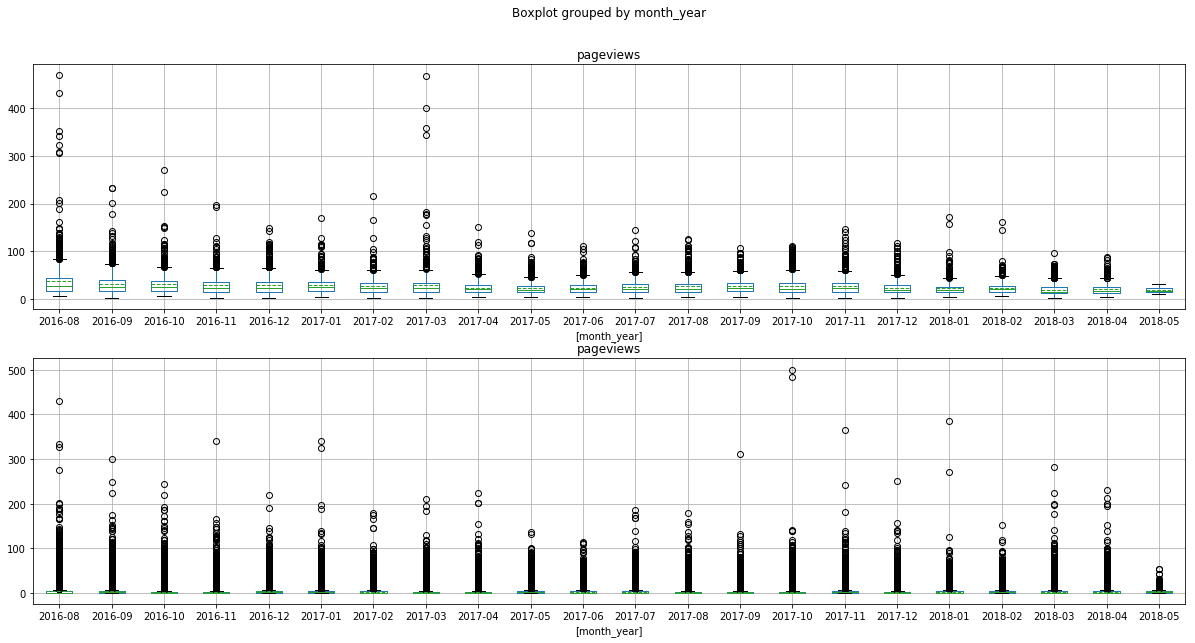

In [190]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(20, 10))

a1=DataR[['pageviews','month_year']]
a1.boxplot(by='month_year', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=True, ax = ax[0])
a2 = DataNonR[['pageviews','month_year']]
a2.boxplot(by='month_year', meanline=True, showmeans=True, showcaps=True, 
           showbox=True, showfliers=True, ax = ax[1])

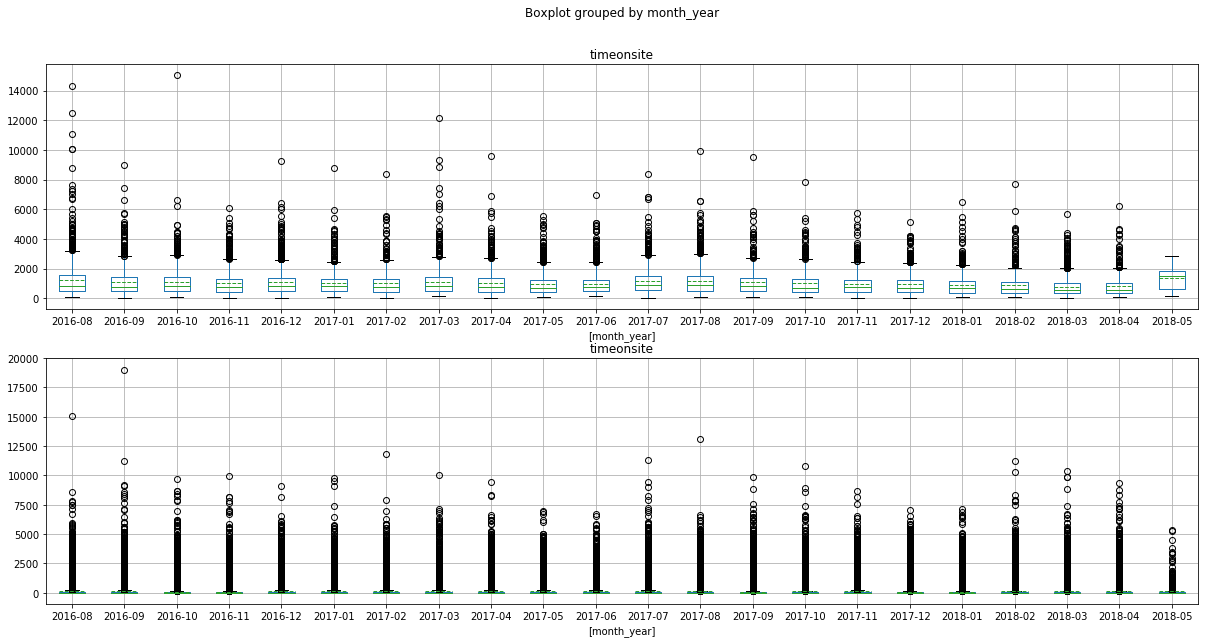

In [173]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(20,10))

a1=DataR[['timeonsite','month_year']]
a1.boxplot(by='month_year', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=True, ax = ax[0])
a2 = DataNonR[['timeonsite','month_year']]
a2.boxplot(by='month_year', meanline=True, showmeans=True, showcaps=True, 
           showbox=True, showfliers=True, ax = ax[1])

# Explore Revenue on Total Number of Transactions

Is transcation Revenue stationary

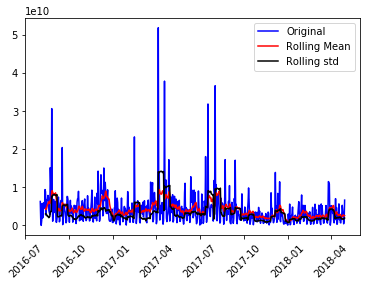

Test Statistic                 -3.317333
p-value                         0.014121
# Lag Used                     20.000000
Number of Observation Used    617.000000
Critical Value (1%)            -3.440993
Critical Value (5%)            -2.866236
Critical Value (10%)           -2.569271
dtype: float64


In [75]:
l = df.groupby(['date'])['Revenue_Original'].sum()
rollmean = l.rolling(window = 12, center = False).mean()
rollstd = l.rolling(window = 12, center = False).std()
orig = plt.plot(l,
               color = 'blue',
               label = 'Original')
mean = plt.plot(rollmean,
               color = 'red',
               label = 'Rolling Mean')
std = plt.plot(rollstd,
               color = 'black',
               label = 'Rolling std')
plt.legend(loc = 'best')
plt.xticks(rotation = 45)
plt.show(block = False)
plt.close()

dftest = adfuller(l,
                 autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4],
                    index = ['Test Statistic',
                            'p-value',
                            '# Lag Used',
                            'Number of Observation Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print (dfoutput)

## Timeseries

In [216]:
def plot_compare_num(df,col,num,value):
    order= [0,1,2]
    for index,item in enumerate(value):
        if item == -1:
            order[index] = df[col[index]].value_counts().index
        else:
            order[index] = df[col[index]].value_counts().iloc[:item].index
    
    fig, ax = plt.subplots(3,1, figsize = (12, 12),sharey=True)
    
    sns.boxplot(x=col[0], y=num, hue="Revenue_label", data=df,showfliers=False, order = order[0], ax = ax[0])
    ax[0].set_title(col[0])
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
    
    sns.boxplot(x=col[1], y=num, hue="Revenue_label",  data=df,showfliers=False,order = order[1], ax = ax[1])
    
    ax[1].set_title(col[1])
    ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
    
    sns.boxplot(x=col[2], y=num, hue="Revenue_label", data=df,showfliers=False, order = order[2], ax = ax[2])
    ax[2].set_title(col[2])
    ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation=90)
    plt.tight_layout()
    plt.show()

In [218]:
#plot_compare_num(df,["channelGrouping","subContinent",'OS'],'pageviews',[-1,-1,6])

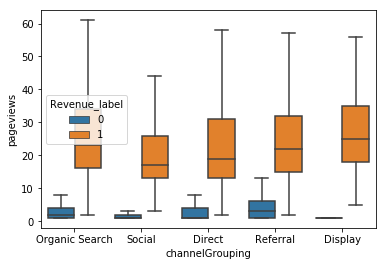

In [192]:
sns.boxplot(x="channelGrouping", y="pageviews", hue="Revenue_label",  \
            data=df,showfliers=False, order = df["channelGrouping"].value_counts().iloc[:5].index)

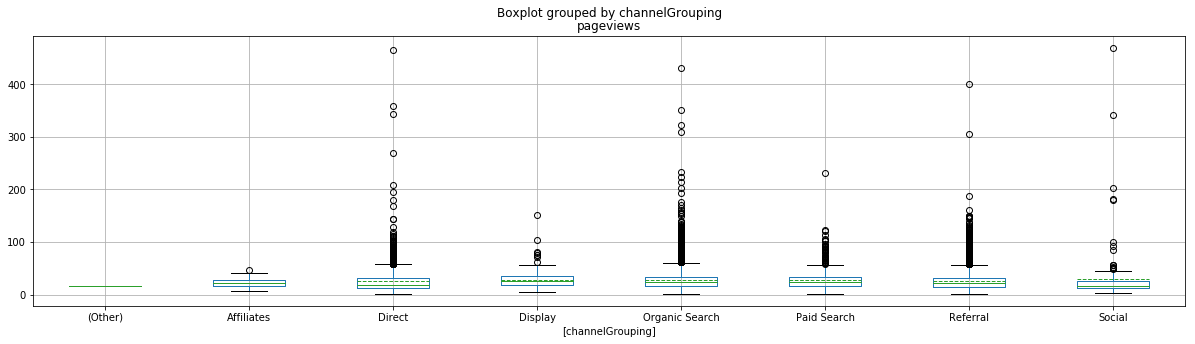

In [169]:
fig, ax = plt.subplots(figsize=(20, 5))

a1=DataR[['pageviews','channelGrouping']]

a1.boxplot(by='channelGrouping', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=True, ax = ax)

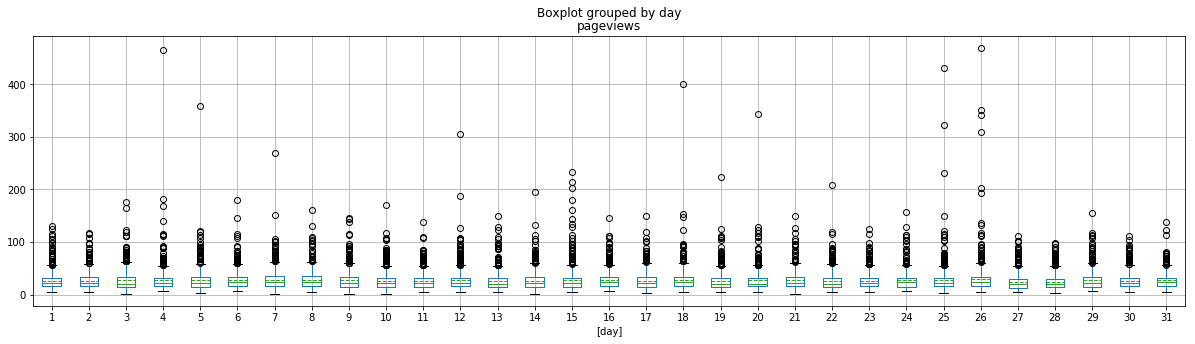

In [214]:
fig, ax = plt.subplots(figsize=(20, 5))

a1=DataR[['pageviews','day']]
a1.boxplot(by='day', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=True, ax = ax)

## Categorical

In [274]:
def show_agg(df,df2, col, col2):
    temp = df.groupby(col).agg({col2: [ 'median', 'mean']}).sort_values((col2, 'mean'), ascending=False)
    #temp = temp.join(df2.groupby(col).agg({col2: ['median','mean']}).sort_values((col2, 'mean'), ascending=False),lsuffix='_Revenue', rsuffix='_Non_Revenue')
    return temp

[Text(0,0,'Display'),
 Text(0,0,'Paid Search'),
 Text(0,0,'Organic Search'),
 Text(0,0,'Social'),
 Text(0,0,'Referral'),
 Text(0,0,'Direct'),
 Text(0,0,'Affiliates'),
 Text(0,0,'(Other)')]

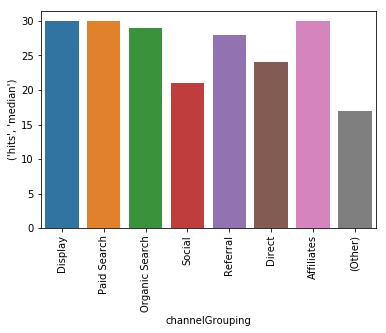

In [289]:
tips = show_agg(DataR,DataNonR, 'channelGrouping','hits')
ax = sns.barplot(x = tips.iloc[:,0].index,y = tips.iloc[:,0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [273]:
tips.iloc[:,3][:]#.info()

OS
Windows Phone    2.541816
Windows          3.114213
Chrome OS        5.021082
Android          2.980099
Macintosh        4.123863
Linux            4.158399
iOS              3.196767
Name: (pageviews_Non_Revenue, mean), dtype: float64

In [239]:
show_agg(DataR,DataNonR, 'channelGrouping','pageviews')

pageviews_Revenue            pageviews_Non_Revenue          
                           median       mean                median      mean
channelGrouping                                                             
Social                       17.0  29.496894                   1.0  1.929230
Organic Search               23.0  28.434246                   2.0  3.752824
Display                      25.0  28.434146                   1.0  1.831219
Paid Search                  24.0  28.170183                   2.0  4.524869
Referral                     22.0  26.391335                   3.0  5.136671
Direct                       19.0  25.109036                   1.0  3.499025
Affiliates                   22.0  22.941176                   1.0  2.928476
(Other)                      16.0  16.000000                   1.5  3.338235

In [285]:
#DataR.groupby('channelGrouping')['Revenue_Original'].mean().plot('bar', ax = ax[1, 0]);
#ax[1, 0].set_title('Mean revenue');
#DataR.groupby('channelGrouping')['Revenue_Original'].sum().plot('bar', ax = ax[1, 1]);
#ax[1, 1].set_title('Total revenue');
#plt.tight_layout()

### Time Series

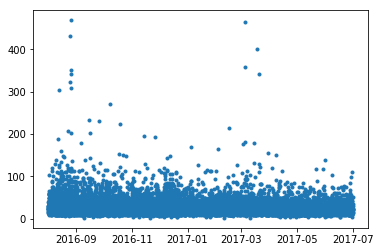

In [23]:
selectime = DataR[(DataR['visitStartTime'] <'2017 - 07 - 01')]
plt.plot(selectime['visitStartTime'],selectime['pageviews'],marker='.',linestyle = '')

# Feature Engineering

In [5]:
def featureEngineering(df):
    DataR = df[df['Revenue_label'] == 1]
    DataNonR = df[df['Revenue_label'] != 1]
    before = DataR[(DataR['visitStartTime'] <'2017 - 07 - 15')]
    after = DataR[(DataR['visitStartTime'] >'2017 - 07 - 15')]
    aftermedian = after['sessionQualityDim'].median()
    before['sessionQualityDim']= np.ones(len(before))*aftermedian
    frames = [before,after]
    DataR = pd.concat(frames)
    frames = [DataR,DataNonR]
    df = pd.concat(frames)
    return df
    

In [10]:
df.to_pickle("Data_visualization.pkl")

In [74]:
df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,browser,deviceCategory,OS,subContinent,...,timeonsite,Revenue_Original,source,transactionRevenueLog,Revenue_label,month_year,hourofday,timeofday,timeofweek,day
0,Organic Search,2017-10-16,3162355547410993243,1508198450,1,2017-10-17 00:00:50,Firefox,desktop,Windows,Western Europe,...,1.0,0,google,0.0,0,2017-10,0,Morn,Tuesday,17
1,Referral,2017-10-16,8934116514970143966,1508176307,6,2017-10-16 17:51:47,Chrome,desktop,Chrome OS,Northern America,...,28.0,0,sites.google.com,0.0,0,2017-10,17,Even,Monday,16
2,Direct,2017-10-16,7992466427990357681,1508201613,1,2017-10-17 00:53:33,Chrome,mobile,Android,Northern America,...,38.0,0,(direct),0.0,0,2017-10,0,Morn,Tuesday,17
3,Organic Search,2017-10-16,9075655783635761930,1508169851,1,2017-10-16 16:04:11,Chrome,desktop,Windows,Western Asia,...,1.0,0,google,0.0,0,2017-10,16,Even,Monday,16
4,Organic Search,2017-10-16,6960673291025684308,1508190552,1,2017-10-16 21:49:12,Chrome,desktop,Windows,Central America,...,52.0,0,google,0.0,0,2017-10,21,Even,Monday,16
